In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
pd.set_option('display.max_columns', None)


In [3]:
# Загрузка сырых данных

sessions_path = "C:/Users/Ekaterina/sber_de/de_for_sber/data/raw/ga_sessions.csv"
df_sessions = pd.read_csv(sessions_path)

# Просмотр данных
df_sessions.head()


C:\Users\Ekaterina\AppData\Local\Temp\ipykernel_17396\2207900667.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv(sessions_path)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
#Общая информация
print(df_sessions.info())
print(df_sessions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB
None
       visit_number
count  1.860042e+06
mean   2.712804e+00
std    1.

In [6]:
# 1. Анализ пропущенных данных
missing_data = df_sessions.isnull().sum()  # Считаем количество пропущенных значений в каждом столбце
missing_percentage = (missing_data / len(df_sessions)) * 100  # Процент пропущенных значений
missing_data = pd.DataFrame({"Missing Data": missing_data, "Percentage": missing_percentage})
print(missing_data)  # Выводим информацию о пропущенных данных


                          Missing Data  Percentage
session_id                           0    0.000000
client_id                            0    0.000000
visit_date                           0    0.000000
visit_time                           0    0.000000
visit_number                         0    0.000000
utm_source                          97    0.005215
utm_medium                           0    0.000000
utm_campaign                    219603   11.806346
utm_adcontent                   335615   18.043410
utm_keyword                    1082061   58.174009
device_category                      0    0.000000
device_os                      1070138   57.533002
device_brand                    367178   19.740307
device_model                   1843704   99.121633
device_screen_resolution             0    0.000000
device_browser                       0    0.000000
geo_country                          0    0.000000
geo_city                             0    0.000000


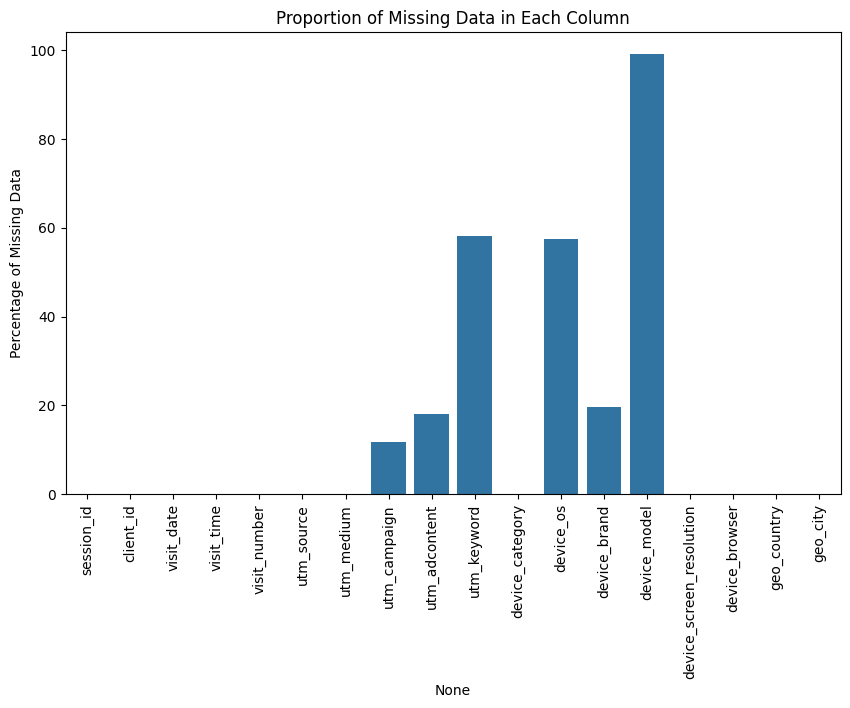

In [7]:
# Визуализируем пропущенные данные
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data["Percentage"])
plt.title("Proportion of Missing Data in Each Column")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Data")
plt.show()

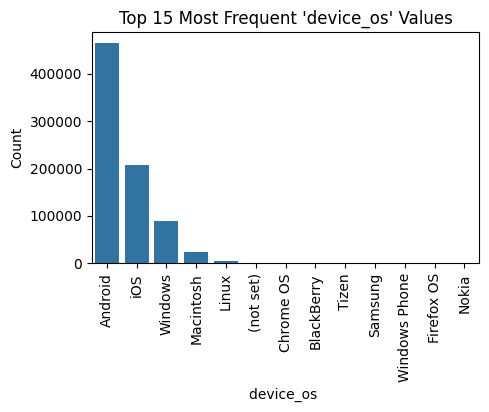

In [11]:
top_15_device_os  = df_sessions['device_os'].value_counts().nlargest(15)
plt.figure(figsize=(5, 3))
sns.barplot(x=top_15_device_os.index, y=top_15_device_os.values)
plt.title("Top 15 Most Frequent 'device_os' Values")
plt.xticks(rotation=90)
plt.xlabel("device_os ")
plt.ylabel("Count")
plt.show()

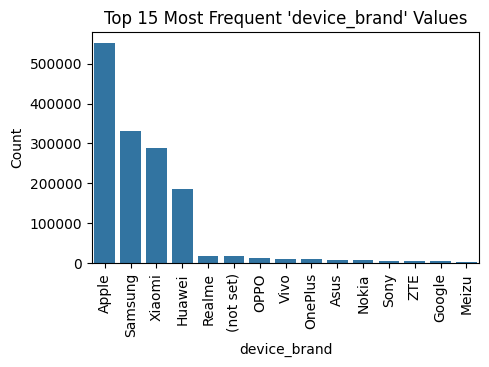

In [12]:
top_15_device_brand  = df_sessions['device_brand'].value_counts().nlargest(15)
plt.figure(figsize=(5, 3))
sns.barplot(x=top_15_device_brand.index, y=top_15_device_brand.values)
plt.title("Top 15 Most Frequent 'device_brand' Values")
plt.xticks(rotation=90)
plt.xlabel("device_brand")
plt.ylabel("Count")
plt.show()

In [ ]:
#странно, ос - андроид, а бренд - эппл

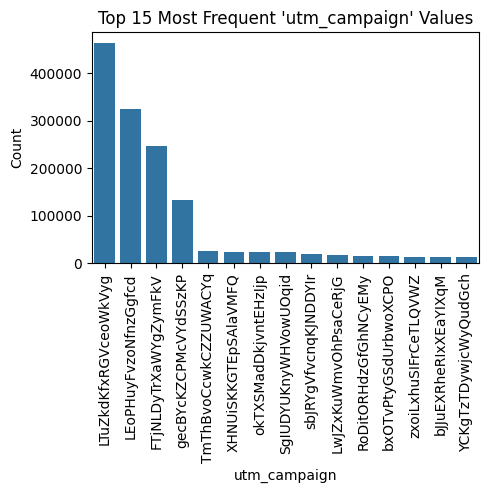

In [13]:
top_15_utm_campaign  = df_sessions['utm_campaign'].value_counts().nlargest(15)
plt.figure(figsize=(5, 3))
sns.barplot(x=top_15_utm_campaign.index, y=top_15_utm_campaign.values)
plt.title("Top 15 Most Frequent 'utm_campaign' Values")
plt.xticks(rotation=90)
plt.xlabel("utm_campaign")
plt.ylabel("Count")
plt.show()

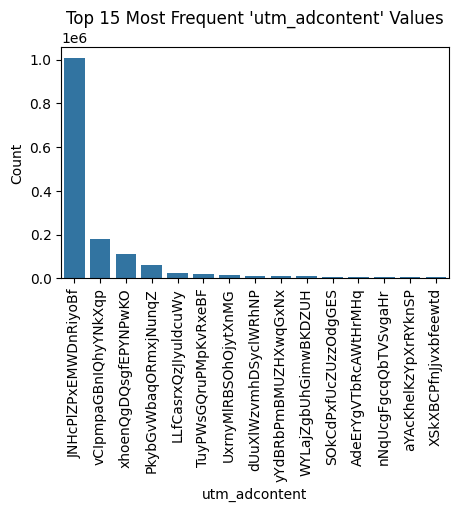

In [14]:
top_15_utm_adcontent  = df_sessions['utm_adcontent'].value_counts().nlargest(15)
plt.figure(figsize=(5, 3))
sns.barplot(x=top_15_utm_adcontent.index, y=top_15_utm_adcontent.values)
plt.title("Top 15 Most Frequent 'utm_adcontent' Values")
plt.xticks(rotation=90)
plt.xlabel("utm_adcontent")
plt.ylabel("Count")
plt.show()

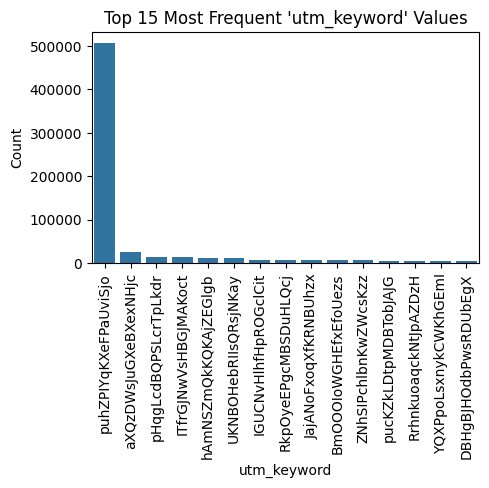

In [15]:
top_15_utm_keyword  = df_sessions['utm_keyword'].value_counts().nlargest(15)
plt.figure(figsize=(5, 3))
sns.barplot(x=top_15_utm_keyword.index, y=top_15_utm_keyword.values)
plt.title("Top 15 Most Frequent 'utm_keyword' Values")
plt.xticks(rotation=90)
plt.xlabel("utm_keyword")
plt.ylabel("Count")
plt.show()

In [17]:
df_sessions['utm_campaign'] = df_sessions['utm_campaign'].fillna('unknown')
df_sessions['utm_adcontent'] = df_sessions['utm_adcontent'].fillna('unknown')
df_sessions['utm_keyword'] = df_sessions['utm_keyword'].fillna('unknown')
df_sessions['device_os'] = df_sessions['device_os'].fillna('unknown')
df_sessions['device_brand'] = df_sessions['device_brand'].fillna('unknown')
    

In [22]:
df_sessions['utm_source'] = df_sessions['utm_source'].fillna('unknown')

In [19]:
# Преобразование даты
df_sessions["visit_date"] = pd.to_datetime(df_sessions["visit_date"], errors='coerce')

# Преобразование времени
df_sessions['visit_time'] = pd.to_datetime(df_sessions['visit_time'], format='%H:%M:%S').dt.time

# Преобразование типов данных
df_sessions["client_id"] = df_sessions["client_id"].astype(str)
df_sessions["session_id"] = df_sessions["session_id"].astype(str)

# Удаление пустой колонки
df_sessions = df_sessions.drop(columns='device_model', axis=1)


In [23]:
df_sessions.isnull().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

In [24]:
df_sessions[df_sessions.duplicated(subset='session_id', keep=False)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
